# TRABAJO FINAL DE GRADO - PEC 3
###### Autor: Claudia Reina Fajardo
###### Noviembre 2021

## Modelo de Deep Learning - Pruebas con el Dataset

Cuando hicimos los árboles de decisión vimos que existen algunas variables, para cada una de las clases que estamos buscando, que son más relevantes que otras a la hora de clasificar.

Vamos a hacer pruebas para cada una de estas categorías con dichas variables y compararlas con los resultados obtenidos mediante el dataset entero.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns

### Combinaciones de variables óptimas para cada variable de estudio

Mediante una matriz de correlaciones elegiremos las 19 variables más directamente correlacionadas con aquél factor que queremos estudiar y veremos cómo afecta esto a los resultados de los entrenamientos

In [2]:
def redNeuronal(variable, n):    
    # plantamos semilla para que no varíe el resultado
    tf.random.set_seed(1)

    
    # cargamos el dataset
    df = pd.read_csv('data.csv')
    
    # Creamos una matriz de correlación
    corr_matrix = df.corr(method='pearson')
    corr_matrix = corr_matrix[variable]
    corr_matrix = corr_matrix.sort_values()
    names=corr_matrix.tail(n).index
    
    # Creamos el dataset
    data1=df[names.tolist()]
    
    # eliminamos la clase del conjunto de datos y los elementos sin clasificar y la guardamos para comprobar precisión
    data1=data1[data1[variable]<2]
    Y=data1[variable]
    X=data1.drop([variable], axis=1).values
    
    # Definimos el ratio de aprendizaje y la distribución de las neuronas
    lr = 0.001
    nn = [2, 16, 8, 1]


    # Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas.
    model = kr.Sequential()

    # Añadimos la capa 1
    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

    # Añadimos la capa 2
    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

    # Añadimos la capa 3, que corresponde a la salida de la red
    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

    # Compilamos el modelo, definiendo la función de coste y el optimizador.
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['acc'])

    # Recogemos accuracy total
    results=model.evaluate(X, Y)
    
    return results

In [3]:
variables = ['depressed', 'dead', 'sleep', 'yourself', 'profMental']
numbers = list(range(8, 20))
data= pd.DataFrame(columns=variables, index=numbers)
for variable in variables:
    for number in numbers:
        results=redNeuronal(variable, number)
        data.loc[number,variable]=np.round((100*results[1]),2)

157/157 [==============================] - 0s 1ms/step - loss: 0.2250 - acc: 0.8185


In [4]:
data

,depressed,dead,sleep,yourself,profMental
8,74.42,66.61,64.79,70.15,75.17
9,54,58.98,63.87,61.68,66.74
10,75.06,76.31,37.47,70.85,70.94
11,25.18,62.57,60.75,76.81,57.39
12,71.04,91.66,36.91,25.37,86.33
13,24.42,42.38,61.89,73.35,20.05
14,29.28,89.26,32.53,17.43,81.97
15,48.06,3.74,51.67,23.75,9.47
16,25.68,13.29,38.65,46.8,20.61
17,73.12,60.4,65.59,24.09,16.31


Ya tenemos, pada cada variable, la lista de precisiones usando entre 8 y 19 variables más correlacionadas.

Creamos el algoritmo de entrenamiento, al que pasaremos la variable y el número de variables correlacionadas con las que queremos trabajar.

In [5]:
def trainRN(variable, n):    
    # plantamos semilla para que no varíe el resultado
    tf.random.set_seed(2)
    
    # cargamos el dataset
    df = pd.read_csv('data.csv')
    
    # Creamos una matriz de correlación
    corr_matrix = df.corr(method='pearson')
    corr_matrix = corr_matrix[variable]
    corr_matrix = corr_matrix.sort_values()
    names=corr_matrix.tail(n).index
    
    # Creamos el dataset
    data1=df[names.tolist()]
    
    # eliminamos la clase del conjunto de datos y los elementos sin clasificar y la guardamos para comprobar precisión
    data2=data1[data1[variable]<2]
    Y=data2[variable]
    X=data2.drop([variable], axis=1).values
    
    # Definimos el ratio de aprendizaje y la distribución de las neuronas
    lr = 0.001
    nn = [2, 16, 8, 1]


    # Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas.
    model = kr.Sequential()

    # Añadimos la capa 1
    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

    # Añadimos la capa 2
    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

    # Añadimos la capa 3, que corresponde a la salida de la red
    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

    # Compilamos el modelo, definiendo la función de coste y el optimizador.
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['acc'])

    # Y entrenamos al modelo, añadiendo cortes de entrenamiento y la cantidad de entrenamientos que se hará. 
    training=model.fit(X, Y, validation_split = 0.33, epochs=30)
    
    return names, data1, training, model


Ya estamos listos para iniciar los análisis de cada red neuronal con el mínimo posible de variables dentro de una precisión predefinida.

### Red neuronal sobre depresión

In [6]:
# vemos la precisón máxima que han conseguido los datos
data.depressed.max()

75.06

Dada que la preción máxima obtenida es de un 75% partiremos de un valor de 74% para no bajar mucho la precisión del modelo.

In [7]:
#elección de variables a partir de valor 74
num=data[data['depressed']>74].index.values
num

array([ 8, 10], dtype=int64)

Vemos que podemos obtener esta precisión tanto con 8 como con 10 variables. Nos quedaremos con el mínimo y veremos cómo responde.

In [8]:
# entrenamiento del modelo
names1, data1, training1, model1=trainRN('depressed',num[0])

Epoch 1/30
105/105 [==============================] - 1s 4ms/step - loss: 0.2090 - acc: 0.7574 - val_loss: 0.1754 - val_acc: 0.7514
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1522 - acc: 0.7622 - val_loss: 0.1415 - val_acc: 0.7865
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1274 - acc: 0.8276 - val_loss: 0.1231 - val_acc: 0.8490
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1151 - acc: 0.8416 - val_loss: 0.1159 - val_acc: 0.8520
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1116 - acc: 0.8443 - val_loss: 0.1138 - val_acc: 0.8545
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1102 - acc: 0.8509 - val_loss: 0.1143 - val_acc: 0.8502
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1098 - acc: 0.8482 - val_loss: 0.1119 - val_acc: 0.8563
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 0.

Estas son las variables con las que estamos trabajando:

In [9]:
# variables sobre las que se trabajará
print (' VARIABLES: '+str(names1.values))

 VARIABLES: ['sleep' 'slowlyFast' 'tired' 'appetite' 'concentrateThings'
 'uninterested' 'yourself' 'depressed']


| PROCESO DE APRENDIZAJE DEL MODELO |


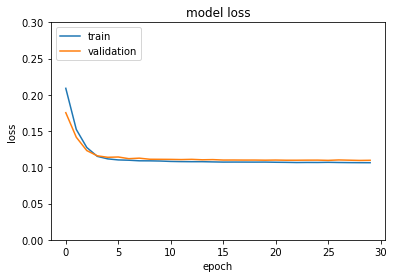

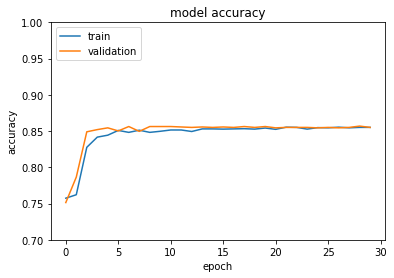

In [10]:
print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training1.history["loss"])
plt.plot(training1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training1.history["acc"])
plt.plot(training1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Vemos que con 30 entrenamientos y una estructura de red neuronal de 16-8-1 obtenemos una preción final de una media cerca de 85% y una pérdida que gira alrededor del 12%.

El modelo se muestra muy estable, sin overfitting.

### Red neuronal sobre pensamientos de muerte

In [11]:
# vemos la precisón máxima que han conseguido los datos
data.dead.max()

96.12

Este máximo es muy alto, con riesgo a sobreentrenamiento, por lo que bajaremos la precisión necesaria a 85%, que ya es muy alta.

In [12]:
# elección de variables a partir del 85%
num=data[data['dead']>85].index.values
num

array([12, 14, 19], dtype=int64)

Tenemos tres cantidades de variables que cumplen con estos objetivos, y nos quedaremos con la mínima de las tres: 12.

In [13]:
# entrenamiento del modelo
names2, data2, training2, model2=trainRN('dead',num[0])

Epoch 1/30
105/105 [==============================] - 1s 5ms/step - loss: 0.0479 - acc: 0.9680 - val_loss: 0.0409 - val_acc: 0.9624
Epoch 2/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0339 - acc: 0.9680 - val_loss: 0.0378 - val_acc: 0.9624
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0318 - acc: 0.9680 - val_loss: 0.0369 - val_acc: 0.9624
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0312 - acc: 0.9680 - val_loss: 0.0359 - val_acc: 0.9624
Epoch 5/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0305 - acc: 0.9680 - val_loss: 0.0341 - val_acc: 0.9624
Epoch 6/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0292 - acc: 0.9680 - val_loss: 0.0316 - val_acc: 0.9624
Epoch 7/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0277 - acc: 0.9680 - val_loss: 0.0303 - val_acc: 0.9624
Epoch 8/30
105/105 [==============================] - 0s 3ms/step - loss: 0.

Estas son las variables con las que estamos trabajando:

In [14]:
# variables sobre las que se trabajará
print (' VARIABLES: '+str(names2.values))

 VARIABLES: ['healthState' 'tired' 'sleep' 'bathing' 'concentrateThings'
 'concentrating' 'uninterested' 'appetite' 'slowlyFast' 'depressed'
 'yourself' 'dead']


| PROCESO DE APRENDIZAJE DEL MODELO |


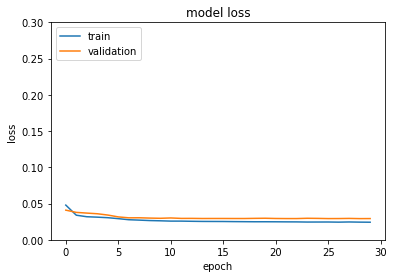

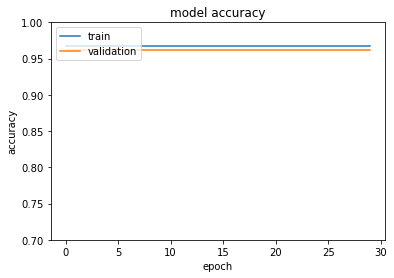

In [15]:
print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training2.history["loss"])
plt.plot(training2.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training2.history["acc"])
plt.plot(training2.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Con 30 entrenamientos y estructura de red 16-8-1 obtenemos una precisión mayor al 95% y una pérdida inferior al 5%.

El modelo es muy estable y no se puede considerar que haya overfitting, ya que las lineas de entrenamiento y validación van paralelas.

### Red neuronal sobre insomnio

In [16]:
# vemos la precisón máxima que han conseguido los datos
data.sleep.max()

65.59

Con este dataset tenemos una precisión máxima muy baja. Pondremos un mínimo de 60% aunque ya rozaría los resultados obtenidos puramente por azar, y nos quedamos con el mínimo de variables que cumplan estos objetivos.

In [17]:
# elección de variables
num=data[data['sleep']>60].index.values
num

array([ 8,  9, 11, 13, 17], dtype=int64)

In [18]:
# entrenamiento del modelo
names3, data3, training3, model3=trainRN('sleep',num[0])

Epoch 1/30
105/105 [==============================] - 1s 4ms/step - loss: 0.2419 - acc: 0.6133 - val_loss: 0.2184 - val_acc: 0.6836
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.2024 - acc: 0.6978 - val_loss: 0.1861 - val_acc: 0.7230
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1832 - acc: 0.7247 - val_loss: 0.1773 - val_acc: 0.7352
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1792 - acc: 0.7229 - val_loss: 0.1755 - val_acc: 0.7364
Epoch 5/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1779 - acc: 0.7208 - val_loss: 0.1750 - val_acc: 0.7400
Epoch 6/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1775 - acc: 0.7235 - val_loss: 0.1747 - val_acc: 0.7364
Epoch 7/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1770 - acc: 0.7235 - val_loss: 0.1746 - val_acc: 0.7424
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 0.

Estas son las variables con las que estamos trabajando:

In [19]:
# variables sobre las que se trabajará
print (' VARIABLES: '+str(names3.values))

 VARIABLES: ['yourself' 'slowlyFast' 'concentrateThings' 'depressed' 'uninterested'
 'appetite' 'tired' 'sleep']


| PROCESO DE APRENDIZAJE DEL MODELO |


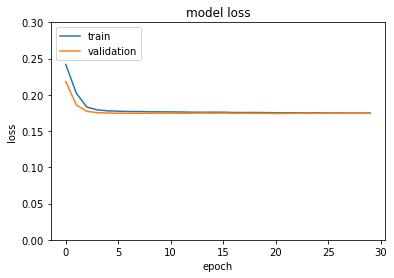

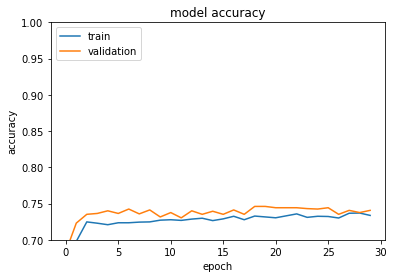

In [20]:
print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training3.history["loss"])
plt.plot(training3.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training3.history["acc"])
plt.plot(training3.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Con 30 entrenamientos y una estructura 16-8-1 obtenemos, finalmente, una precisión superior al 70% (lo cual es más aceptable que los resultados iniciales) y una pérdida que no llega al 20%.

Aunque la pérdida se muestra muy estable la precisión muestra algunas alteraciones, pero las dos lineas se mueven bastante paralelas e incluso la validación muestra más precisión que el entrenamiento, esto puede suceder cuando las muestras de validación son "demasiado sencillas" para el modelo. De todos modos hablamos de algo muy residual y se puede considerar que es un modelo estable.

### Red neuronal sobre autoestima

In [21]:
# vemos la precisón máxima que han conseguido los datos
data.yourself.max()

79.55

Partiremos de una preción del 75% y nos quedaremos con el menor número de variables.

In [22]:
# elección de variables
num=data[data['yourself']>75].index.values
num

array([11, 18], dtype=int64)

In [23]:
# entrenamiento del modelo
names4, data4, training4, model4=trainRN('yourself',num[0])

Epoch 1/30
105/105 [==============================] - 1s 3ms/step - loss: 0.1460 - acc: 0.8289 - val_loss: 0.1328 - val_acc: 0.8206
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1181 - acc: 0.8289 - val_loss: 0.1094 - val_acc: 0.8206
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1040 - acc: 0.8289 - val_loss: 0.1044 - val_acc: 0.8206
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1010 - acc: 0.8289 - val_loss: 0.1026 - val_acc: 0.8206
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0997 - acc: 0.8626 - val_loss: 0.1018 - val_acc: 0.8661
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0988 - acc: 0.8719 - val_loss: 0.1011 - val_acc: 0.8703
Epoch 7/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0978 - acc: 0.8716 - val_loss: 0.1007 - val_acc: 0.8758
Epoch 8/30
105/105 [==============================] - 0s 3ms/step - loss: 0.

Estas son las variables con las que estamos trabajando:

In [24]:
# variables sobre las que se trabajará
print (' VARIABLES: '+str(names4.values))

 VARIABLES: ['healthState' 'concentrating' 'sleep' 'tired' 'dead' 'slowlyFast'
 'appetite' 'concentrateThings' 'uninterested' 'depressed' 'yourself']


| PROCESO DE APRENDIZAJE DEL MODELO |


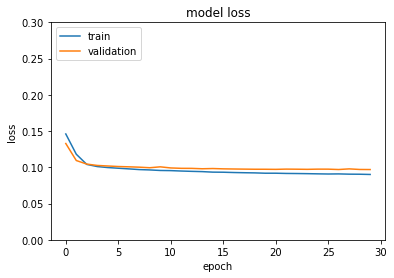

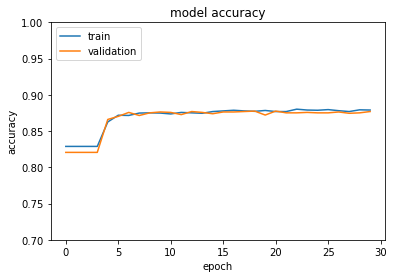

In [25]:
print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training4.history["loss"])
plt.plot(training4.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training4.history["acc"])
plt.plot(training4.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Con 30 entrenamientos y una estructura de 16-8-1 obtenemos una precisión alrededor del 87% y una pérdida sobre el 10%.

El modelo se muestra muy estable, sin overfitting.

### Red neuronal sobre visita en salud mental

In [26]:
# vemos la precisón máxima que han conseguido los datos
data.profMental.max()

86.33

Partimos de una precisión del 80% y nos quedamos con el menor número de variables.

In [27]:
# elección de variables
num=data[data['profMental']>80].index.values
num

array([12, 14, 19], dtype=int64)

In [28]:
# entrenamiento del modelo
names5, data5, training5, model5=trainRN('profMental',num[0])

Epoch 1/30
105/105 [==============================] - 1s 5ms/step - loss: 0.0916 - acc: 0.9151 - val_loss: 0.0817 - val_acc: 0.9176
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0829 - acc: 0.9151 - val_loss: 0.0788 - val_acc: 0.9176
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0795 - acc: 0.9151 - val_loss: 0.0750 - val_acc: 0.9176
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0754 - acc: 0.9151 - val_loss: 0.0715 - val_acc: 0.9176
Epoch 5/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0729 - acc: 0.9151 - val_loss: 0.0705 - val_acc: 0.9176
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0718 - acc: 0.9151 - val_loss: 0.0698 - val_acc: 0.9176
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0711 - acc: 0.9151 - val_loss: 0.0695 - val_acc: 0.9176
Epoch 8/30
105/105 [==============================] - 0s 3ms/step - loss: 0.

Estas son las variables con las que estamos trabajando:

In [29]:
# variables sobre las que se trabajará
print (' VARIABLES: '+str(names5.values))

 VARIABLES: ['healthState' 'slowlyFast' 'tired' 'sleep' 'appetite' 'walking'
 'depressed' 'yourself' 'concentrateThings' 'errands' 'concentrating'
 'profMental']


| PROCESO DE APRENDIZAJE DEL MODELO |


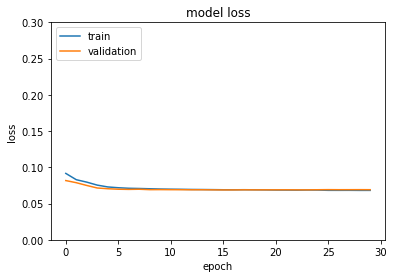

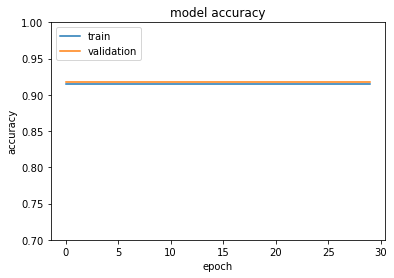

In [30]:
print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training5.history["loss"])
plt.plot(training5.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training5.history["acc"])
plt.plot(training5.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Con 30 entrenamientos y estructura 16-8-1 tenemos una precisión superior al 90% y una pérdida sobre el 7%.

El modelo es altamente estable, sin desviaciones en sus lineas de entrenamiento y validación y sin overfitting.

## Pruebas de predicción del modelo de Deep Learning optimizado

### Depresión

In [31]:
# probamos con aquellos valores que no se habían clasificado
prob=data1[data1.depressed>1]
prob=prob.drop(['depressed'], axis=1).values

new=model1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [0. 0. 0. 0. 0. 0. 1.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [0. 0. 0. 0. 0. 1. 0.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [0. 0. 1. 0. 0. 0. 9.]
 - Clasificación        : [1.]

 - Datos sin clasificar        : [1. 0. 0. 0. 9. 9. 0.]
 - Clasificación        : [1.]



Partiendo de las variables que sabemos que tenemos, vamos a introducir respuestas a ver cómo se comporta la predicción.

Probaremos con las siguientes combinaciones:

|     	| Insomnio 	| Lentitud 	| Cansancio 	| Apetito 	| Concentración(tareas) 	| Desinterés 	| Autoestima 	|
|:---:	|:--------:	|:--------:	|:---------:	|:-------:	|:-------------:	|:----------:	|:----------:	|
| EJ1 	|    Sí    	|    No    	|     Sí    	|    Sí   	|       No      	|     Sí     	|     Sí     	|
| EJ2 	|    Sí    	|    Sí    	|     Sí    	|    Sí   	|       Sí      	|     Sí     	|     Sí     	|
| EJ3 	|    No    	|    Sí    	|     Sí    	|    No   	|       No      	|     No     	|     No     	|
| EJ4 	|    No    	|    No    	|     No    	|    Sí   	|       Sí      	|     Sí     	|     Sí     	|

In [32]:
a=[1.,0.,1.,1.,0.,1.,1.]
b=[1.,1.,1.,1.,1.,1.,1.]
c=[0.,1.,1.,0.,0.,0.,0.]
d=[0.,0.,0.,1.,1.,1.,1.]
test=pd.DataFrame((a, b, c, d), index=["ej1","ej2","ej3","ej4"])
new=model1.predict(test.values)

print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
print(' - Clasificación EJ1        : '+str(np.round(new[0],0)))
print('')
print(' - Clasificación EJ2        : '+str(np.round(new[1],0)))
print('')
print(' - Clasificación EJ3        : '+str(np.round(new[2],0)))
print('')
print(' - Clasificación EJ4        : '+str(np.round(new[3],0)))

| RESULTADO DE LA PREDICCIÓN |
 - Clasificación EJ1        : [1.]

 - Clasificación EJ2        : [1.]

 - Clasificación EJ3        : [0.]

 - Clasificación EJ4        : [1.]


### Pensamientos de muerte

In [33]:
# probamos con aquellos valores que no se habían clasificado
prob=data2[data2.dead>1]
prob=prob.drop(['dead'], axis=1).values

new=model2.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [5. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [4. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.]
 - Clasificación        : [0.]



Partiendo de las variables que sabemos que tenemos, vamos a introducir respuestas a ver cómo se comporta la predicción.

Probaremos con las siguientes combinaciones:

|     	| Salud 	| Cansancio 	| Insomnio 	| Dif.Aseo 	| Concentración(tareas) 	| Concentración(gral) 	| Desinterés 	| Apetito 	| Lentitud 	| Depresión 	| Autoestima 	|
|:---:	|:-----:	|:---------:	|:--------:	|:--------:	|:--------------:	|:--------------:	|:----------:	|:-------:	|:--------:	|:---------:	|:----------:	|
| EJ1 	| Buena 	|     No    	|    Sí    	|    Sí    	|       No       	|       Sí       	|     Sí     	|    No   	|    No    	|     No    	|     Sí     	|
| EJ2 	| Pobre 	|     Sí    	|    Sí    	|    Sí    	|       Sí       	|       Sí       	|     Sí     	|    Sí   	|    Sí    	|     Sí    	|     Sí     	|
| EJ3 	| Buena 	|     Sí    	|    Sí    	|    No    	|       No       	|       No       	|     No     	|    No   	|    Sí    	|     No    	|     No     	|
| EJ4 	| Pobre 	|     No    	|    No    	|    No    	|       Sí       	|       No       	|     No     	|    Sí   	|    No    	|     Sí    	|     No     	|

In [34]:
a=[3.,0.,1.,1.,0.,1.,1.,0.,0.,0.,1.]
b=[5.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
c=[3.,1.,1.,0.,0.,0.,0.,0.,1.,0.,0.]
d=[5.,0.,0.,0.,1.,0.,0.,1.,0.,1.,0.]
test=pd.DataFrame((a, b, c, d), index=["ej1","ej2","ej3","ej4"])
new=model2.predict(test.values)

print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
print(' - Clasificación EJ1        : '+str(np.round(new[0],0)))
print('')
print(' - Clasificación EJ2        : '+str(np.round(new[1],0)))
print('')
print(' - Clasificación EJ3        : '+str(np.round(new[2],0)))
print('')
print(' - Clasificación EJ4        : '+str(np.round(new[3],0)))

| RESULTADO DE LA PREDICCIÓN |
 - Clasificación EJ1        : [0.]

 - Clasificación EJ2        : [0.]

 - Clasificación EJ3        : [0.]

 - Clasificación EJ4        : [0.]


### Insomnio

In [35]:
# probamos con aquellos valores que no se habían clasificado
prob=data3[data3.sleep>1]
prob=prob.drop(['sleep'], axis=1).values

new=model3.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [0. 0. 0. 0. 0. 0. 0.]
 - Clasificación        : [0.]



Partiendo de las variables que sabemos que tenemos, vamos a introducir respuestas a ver cómo se comporta la predicción.

Probaremos con las siguientes combinaciones:

|     	| Autoestima 	| Lentitud 	| Concentración(tareas) 	| Depresión 	| Desinterés 	| Apetito 	| Cansancio 	|
|:---:	|:----------:	|:--------:	|:-------------:	|:---------:	|:----------:	|:-------:	|:---------:	|
| EJ1 	|     No     	|    No    	|       Sí      	|     No    	|     No     	|    Sí   	|     Sí    	|
| EJ2 	|     Sí     	|    Sí    	|       Sí      	|     Sí    	|     Sí     	|    Sí   	|     Sí    	|
| EJ3 	|     Sí     	|    No    	|       Sí      	|     No    	|     Sí     	|    No   	|     No    	|
| EJ4 	|     No     	|    Sí    	|       Sí      	|     No    	|     Sí     	|    No   	|     Sí    	|

In [36]:
a=[0.,0.,1.,0.,0.,1.,1.]
b=[1.,1.,1.,1.,1.,1.,1.]
c=[1.,0.,1.,0.,1.,0.,0.]
d=[0.,1.,1.,0.,1.,0.,1.]
test=pd.DataFrame((a, b, c, d), index=["ej1","ej2","ej3","ej4"])
new=model3.predict(test.values)

print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
print(' - Clasificación EJ1        : '+str(np.round(new[0],0)))
print('')
print(' - Clasificación EJ2        : '+str(np.round(new[1],0)))
print('')
print(' - Clasificación EJ3        : '+str(np.round(new[2],0)))
print('')
print(' - Clasificación EJ4        : '+str(np.round(new[3],0)))

| RESULTADO DE LA PREDICCIÓN |
 - Clasificación EJ1        : [1.]

 - Clasificación EJ2        : [1.]

 - Clasificación EJ3        : [1.]

 - Clasificación EJ4        : [1.]


### Autoestima

In [37]:
# probamos con aquellos valores que no se habían clasificado
prob=data4[data4.yourself>1]
prob=prob.drop(['yourself'], axis=1).values

new=model4.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [2. 1. 0. 1. 1. 0. 0. 0. 0. 9.]
 - Clasificación        : [1.]



Partiendo de las variables que sabemos que tenemos, vamos a introducir respuestas a ver cómo se comporta la predicción.

Probaremos con las siguientes combinaciones:

|     	|  Salud 	| Concentración(gral) 	| Insomnio 	| Cansancio 	| P.Muerte 	| Lentitud 	| Apetito 	| Concentración(tareas) 	| Desinterés 	| Depresión 	|
|:---:	|:------:	|:--------------:	|:--------:	|:---------:	|:--------:	|:--------:	|:-------:	|:--------------:	|:----------:	|:---------:	|
| EJ1 	|  Buena 	|       No       	|    Sí    	|     No    	|    No    	|    Sí    	|    Sí   	|       Sí       	|     No     	|     No    	|
| EJ2 	| Normal 	|       Sí       	|    Sí    	|     Sí    	|    Sí    	|    Sí    	|    Sí   	|       Sí       	|     Sí     	|     Sí    	|
| EJ3 	|  Pobre 	|       No       	|    No    	|     No    	|    Sí    	|    No    	|    No   	|       No       	|     Sí     	|     Sí    	|
| EJ4 	| Normal 	|       Sí       	|    Sí    	|     Sí    	|    No    	|    No    	|    No   	|       Sí       	|     No     	|     No    	|

In [38]:
a=[3.,0.,1.,0.,0.,1.,1.,1.,0.,0.]
b=[4.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
c=[5.,0.,0.,0.,1.,0.,0.,0.,1.,1.]
d=[4.,1.,1.,1.,0.,0.,0.,1.,0.,0.]
test=pd.DataFrame((a, b, c, d), index=["ej1","ej2","ej3","ej4"])
new=model4.predict(test.values)

print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
print(' - Clasificación EJ1        : '+str(np.round(new[0],0)))
print('')
print(' - Clasificación EJ2        : '+str(np.round(new[1],0)))
print('')
print(' - Clasificación EJ3        : '+str(np.round(new[2],0)))
print('')
print(' - Clasificación EJ4        : '+str(np.round(new[3],0)))

| RESULTADO DE LA PREDICCIÓN |
 - Clasificación EJ1        : [0.]

 - Clasificación EJ2        : [1.]

 - Clasificación EJ3        : [1.]

 - Clasificación EJ4        : [0.]


### Visita a salud mental

In [39]:
# probamos con aquellos valores que no se habían clasificado
prob=data5[data5.profMental>1]
prob=prob.drop(['profMental'], axis=1).values

new=model5.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [5. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [3. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 - Clasificación        : [0.]



Partiendo de las variables que sabemos que tenemos, vamos a introducir respuestas a ver cómo se comporta la predicción.

Probaremos con las siguientes combinaciones:
    
|     	|  Salud 	| Lentitud 	| Cansancio 	| Insomnio 	| Apetito 	| Dif.Andar 	| Depresión 	| Autoestima 	| Concentración(tareas) 	| Dif.Recados 	| Concentración(gral) 	|
|:---:	|:------:	|:--------:	|:---------:	|:--------:	|:-------:	|:---------:	|:---------:	|:----------:	|:---------------------:	|:-----------:	|:-------------------:	|
| EJ1 	|  Buena 	|    No    	|     Sí    	|    No    	|    No   	|     Sí    	|     Sí    	|     Sí     	|           No          	|      No     	|          Sí         	|
| EJ2 	| Normal 	|    Sí    	|     Sí    	|    Sí    	|    Sí   	|     Sí    	|     Sí    	|     Sí     	|           Sí          	|      Sí     	|          Sí         	|
| EJ3 	|  Pobre 	|    No    	|     No    	|    No    	|    Sí   	|     No    	|     No    	|     No     	|           Sí          	|      Sí     	|          No         	|
| EJ4 	| Normal 	|    Sí    	|     No    	|    Sí    	|    No   	|     No    	|     No    	|     No     	|           No          	|      No     	|          No         	|

In [40]:
a=[3.,0.,1.,0.,0.,1.,1.,1.,0.,0.,1.]
b=[4.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
c=[5.,0.,0.,0.,1.,0.,0.,0.,1.,1.,0.]
d=[4.,1.,0.,1.,0.,0.,0.,0.,0.,0.,0.]
test=pd.DataFrame((a, b, c, d), index=["ej1","ej2","ej3","ej4"])
new=model5.predict(test.values)

print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
print(' - Clasificación EJ1        : '+str(np.round(new[0],0)))
print('')
print(' - Clasificación EJ2        : '+str(np.round(new[1],0)))
print('')
print(' - Clasificación EJ3        : '+str(np.round(new[2],0)))
print('')
print(' - Clasificación EJ4        : '+str(np.round(new[3],0)))

| RESULTADO DE LA PREDICCIÓN |
 - Clasificación EJ1        : [0.]

 - Clasificación EJ2        : [0.]

 - Clasificación EJ3        : [0.]

 - Clasificación EJ4        : [0.]
